# Detecting Kenyan Coins with ULTRALYTICS

Install dependencies

In [1]:
%pip install ultralytics
%pip install supervision

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Check installation

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.11.9 torch-2.3.1 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 402.1/460.4 GB disk)


#### Load model

In [6]:
import cv2
import supervision as sv
from ultralytics import YOLO
# Load a model
model = YOLO("yolov8n.pt")  # pretrained YOLOv8n model

### Run inference

In [9]:
# Run batched inference on a list of images
# results = model(["image.jpg"])  # return a list of Results objects
image = cv2.imread("image.jpg")
results = model(image)[0]


0: 640x480 2 bowls, 1 clock, 173.4ms
Speed: 2.7ms preprocess, 173.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


### Show the image detected annotation

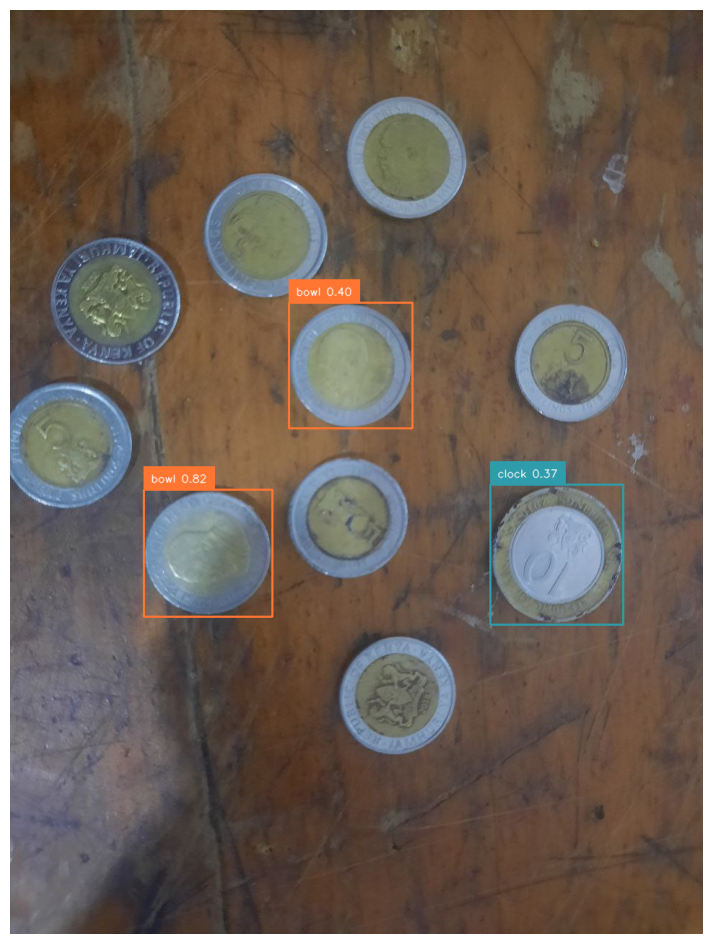

In [17]:
# Process results list
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image, (12, 12))

# Train Yolov8n model

In [18]:
# Train the model with 2 GPUs
results = model.train(data="data.yaml", epochs=100, imgsz=640, device="mps")

Ultralytics YOLOv8.2.48 🚀 Python-3.11.9 torch-2.3.1 MPS (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=

train: Scanning /Users/stevenogwal/datasets/coins/labels/train.cache... 143 images, 0 backgrounds, 0 corrupt: 100%|██████████| 143/143 [00:00<?, ?it/s]

train: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/train/20240623_173749_jpg.rf.02b62d10e8f795a6ba6114f8835f34a9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/train/20240623_173749_jpg.rf.136846300fabcd2cc4bef87d46587802.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/train/20240623_173749_jpg.rf.151150d68e53fb30048b30ff0e953bd5.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/train/20240623_173749_jpg.rf.185211b98381469ce32eada9cce4ccea.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/train/20240623_173749_jpg.rf.189f6b455dfd045b0f474788481c22eb.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/train/20240623_173749_jpg.rf.302457a230eaee24524bb057d0339f0e.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/train/20240623_173749_j


val: Scanning /Users/stevenogwal/datasets/coins/labels/valid.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]

val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174034_jpg.rf.2aaf5d8250078dc50ac7f0bebc925e0b.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174034_jpg.rf.d4c7a6e66453ccec9327b25aa8faa25a.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174054_jpg.rf.0a18208184a07ba46efd4d764426d28e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174054_jpg.rf.731de164c75b3094207fbec3c5a0e5bc.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174054_jpg.rf.e2fba0e1c74cfdb091e1c8dbcf4e018b.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.181      3.428      3.102         54        640: 100%|██████████| 9/9 [00:24<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]

                   all          5          5          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      2.718      2.942      2.669         46        640: 100%|██████████| 9/9 [00:18<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all          5          5    0.00638        0.6      0.226     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G       2.18      2.564      2.343         36        640: 100%|██████████| 9/9 [00:18<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all          5          5    0.00765        0.8      0.285     0.0364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.788      2.283      2.113         40        640: 100%|██████████| 9/9 [00:17<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all          5          5    0.00935          1      0.391      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.206      1.956      1.764         47        640: 100%|██████████| 9/9 [00:16<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all          5          5      0.461        0.8      0.678      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.9068      1.788      1.572         46        640: 100%|██████████| 9/9 [00:17<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all          5          5    0.00721        0.6      0.325     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.7359      1.649      1.477         41        640: 100%|██████████| 9/9 [00:17<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          5          5    0.00721        0.6      0.325     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.6396      1.543      1.405         46        640: 100%|██████████| 9/9 [00:17<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          5          5      0.318        0.4      0.396      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.4906      1.413      1.299         48        640: 100%|██████████| 9/9 [00:17<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all          5          5      0.318        0.4      0.396      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      0.446      1.329      1.271         40        640: 100%|██████████| 9/9 [00:17<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all          5          5     0.0022        0.2     0.0253    0.00758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      0.392       1.24      1.236         48        640: 100%|██████████| 9/9 [00:17<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          5          5      0.988        0.6      0.596      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.3444      1.193       1.18         47        640: 100%|██████████| 9/9 [00:19<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]

                   all          5          5       0.55        0.2       0.45      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.3043      1.167      1.148         42        640: 100%|██████████| 9/9 [00:19<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          5          5      0.694        0.6      0.496      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.2995      1.073      1.145         50        640: 100%|██████████| 9/9 [00:19<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]

                   all          5          5          1      0.777      0.796      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.2805     0.9745      1.113         54        640: 100%|██████████| 9/9 [00:20<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

                   all          5          5          1      0.555      0.711      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.2709      1.014      1.102         48        640: 100%|██████████| 9/9 [00:20<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all          5          5          1      0.742      0.796      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.2347     0.8764      1.072         51        640: 100%|██████████| 9/9 [00:21<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all          5          5          1      0.589      0.738       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.2229     0.8149      1.073         49        640: 100%|██████████| 9/9 [00:20<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]

                   all          5          5      0.695        0.6      0.563      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.2298     0.8278      1.061         45        640: 100%|██████████| 9/9 [00:20<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all          5          5      0.787      0.746      0.756      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.2141     0.7803      1.056         47        640: 100%|██████████| 9/9 [00:20<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]

                   all          5          5          1      0.647      0.796      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.2542     0.8289      1.056         46        640: 100%|██████████| 9/9 [00:21<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all          5          5      0.693        0.4      0.716      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.2108     0.7692      1.042         51        640: 100%|██████████| 9/9 [00:21<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

                   all          5          5          1      0.781      0.796      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.2207     0.7865      1.047         41        640: 100%|██████████| 9/9 [00:20<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

                   all          5          5          1      0.989      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.2009     0.7591      1.031         41        640: 100%|██████████| 9/9 [00:21<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all          5          5          1      0.595      0.685      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.1868     0.6773      1.014         43        640: 100%|██████████| 9/9 [00:21<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]

                   all          5          5      0.966        0.4      0.498      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.1804     0.6406      1.025         37        640: 100%|██████████| 9/9 [00:22<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all          5          5      0.995        0.8      0.962      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.1939     0.6089     0.9989         50        640: 100%|██████████| 9/9 [00:21<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]

                   all          5          5      0.994          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.1689     0.5977      1.007         44        640: 100%|██████████| 9/9 [00:24<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]

                   all          5          5      0.946          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.1639     0.5985     0.9975         51        640: 100%|██████████| 9/9 [00:21<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

                   all          5          5      0.999        0.8      0.962      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.1584     0.5641     0.9884         40        640: 100%|██████████| 9/9 [00:22<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]

                   all          5          5          1      0.797      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.1506     0.5162     0.9866         46        640: 100%|██████████| 9/9 [00:22<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

                   all          5          5      0.997        0.8      0.895      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.1515     0.5244     0.9845         52        640: 100%|██████████| 9/9 [00:22<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all          5          5          1       0.98      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.1555     0.5235     0.9935         51        640: 100%|██████████| 9/9 [00:23<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all          5          5          1      0.973      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.1586     0.5193     0.9894         50        640: 100%|██████████| 9/9 [00:28<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]

                   all          5          5       0.93        0.8      0.796      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.1485     0.5388     0.9735         46        640: 100%|██████████| 9/9 [00:26<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all          5          5          1      0.794      0.796      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.1587     0.5102     0.9997         47        640: 100%|██████████| 9/9 [00:25<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]

                   all          5          5          1      0.597      0.598      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.1476      0.503     0.9824         44        640: 100%|██████████| 9/9 [00:25<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]

                   all          5          5          1      0.589      0.598      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.1533     0.5004      0.961         44        640: 100%|██████████| 9/9 [00:27<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]

                   all          5          5      0.959          1      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.1448     0.4748     0.9614         50        640: 100%|██████████| 9/9 [00:27<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          5          5          1        0.6      0.598      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.1425     0.4678     0.9574         44        640: 100%|██████████| 9/9 [00:26<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]

                   all          5          5      0.981        0.6      0.597      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.1408     0.4784     0.9721         55        640: 100%|██████████| 9/9 [00:27<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]

                   all          5          5      0.988        0.8      0.796      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.1371     0.4519     0.9769         47        640: 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all          5          5      0.985        0.6      0.597      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.1392     0.4494     0.9559         43        640: 100%|██████████| 9/9 [00:28<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]

                   all          5          5      0.996          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.1323     0.4525     0.9488         41        640: 100%|██████████| 9/9 [00:26<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]

                   all          5          5          1      0.399      0.796      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.1374     0.4475     0.9471         48        640: 100%|██████████| 9/9 [00:28<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]

                   all          5          5          1      0.453      0.597      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.1375     0.4432     0.9527         52        640: 100%|██████████| 9/9 [00:28<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


                   all          5          5          1      0.387      0.398      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      0.128     0.4524     0.9673         49        640: 100%|██████████| 9/9 [00:28<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

                   all          5          5      0.979        0.4      0.398      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.1274       0.44     0.9481         51        640: 100%|██████████| 9/9 [00:30<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]

                   all          5          5      0.965        0.4      0.398      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.1193      0.444     0.9496         47        640: 100%|██████████| 9/9 [00:30<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all          5          5      0.916        0.4      0.398      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.1232     0.3756     0.9624         45        640: 100%|██████████| 9/9 [00:30<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]

                   all          5          5      0.892        0.4      0.398      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.1285     0.4335     0.9575         45        640: 100%|██████████| 9/9 [00:33<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all          5          5      0.827        0.2      0.198      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.1224     0.4444     0.9339         45        640: 100%|██████████| 9/9 [00:29<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.44s/it]


                   all          5          5      0.894        0.4      0.398      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.1252     0.4141      0.951         48        640: 100%|██████████| 9/9 [00:31<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.44s/it]


                   all          5          5       0.88        0.4      0.398      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.1181     0.4151     0.9431         40        640: 100%|██████████| 9/9 [00:31<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all          5          5      0.834        0.2      0.199      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.1151     0.3929      0.934         44        640: 100%|██████████| 9/9 [00:34<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.66s/it]


                   all          5          5          1       0.39      0.399      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.1214     0.4391     0.9339         45        640: 100%|██████████| 9/9 [00:31<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.05s/it]


                   all          5          5          1      0.387      0.399      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      0.121     0.4148      0.964         44        640: 100%|██████████| 9/9 [00:27<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.10s/it]


                   all          5          5          1      0.389      0.399      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.1166     0.4719     0.9502         38        640: 100%|██████████| 9/9 [00:29<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.87s/it]


                   all          5          5      0.977        0.4      0.399      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      0.114     0.3938     0.9591         50        640: 100%|██████████| 9/9 [01:39<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.15s/it]


                   all          5          5      0.986        0.6      0.598      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.1063     0.3919     0.9483         44        640: 100%|██████████| 9/9 [00:32<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]


                   all          5          5      0.977        0.4      0.398      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.1102     0.3974     0.9404         47        640: 100%|██████████| 9/9 [00:26<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


                   all          5          5       0.98        0.4      0.398      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.1129     0.3924     0.9271         44        640: 100%|██████████| 9/9 [00:26<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]


                   all          5          5      0.982        0.4      0.398      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.1064     0.3362      0.937         37        640: 100%|██████████| 9/9 [00:31<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]


                   all          5          5      0.982        0.4      0.398      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.1221     0.3479     0.9425         45        640: 100%|██████████| 9/9 [00:30<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.47s/it]


                   all          5          5      0.982        0.4      0.398      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.1083     0.3405     0.9364         44        640: 100%|██████████| 9/9 [00:32<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]

                   all          5          5      0.976        0.4      0.398      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.1074      0.352     0.9239         51        640: 100%|██████████| 9/9 [00:30<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]


                   all          5          5      0.954        0.4      0.398      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.1066     0.3313     0.9295         44        640: 100%|██████████| 9/9 [00:32<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.62s/it]


                   all          5          5      0.941        0.4      0.398      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.1125     0.3662     0.9453         43        640: 100%|██████████| 9/9 [00:33<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.29s/it]


                   all          5          5      0.969        0.4      0.399      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.1049     0.3263     0.9401         52        640: 100%|██████████| 9/9 [00:35<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.39s/it]


                   all          5          5       0.98        0.4        0.4       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.1081     0.3575     0.9233         51        640: 100%|██████████| 9/9 [00:38<00:00,  4.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.71s/it]


                   all          5          5      0.981        0.4      0.401      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G    0.09899     0.3219      0.931         42        640: 100%|██████████| 9/9 [00:37<00:00,  4.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]


                   all          5          5      0.967        0.2      0.202      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G    0.09494     0.3106     0.9391         51        640: 100%|██████████| 9/9 [00:37<00:00,  4.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.10s/it]


                   all          5          5      0.945        0.2        0.2        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.1007      0.307     0.9301         41        640: 100%|██████████| 9/9 [00:36<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


                   all          5          5      0.949        0.2        0.2        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.1008     0.2988     0.9204         49        640: 100%|██████████| 9/9 [00:34<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.13s/it]


                   all          5          5      0.977        0.4      0.401       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.1009     0.3277     0.9235         44        640: 100%|██████████| 9/9 [00:37<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.54s/it]


                   all          5          5      0.973        0.2      0.209      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.0943     0.3232     0.9223         50        640: 100%|██████████| 9/9 [00:37<00:00,  4.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]


                   all          5          5      0.974        0.2      0.211       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G    0.09639     0.3058     0.9287         50        640: 100%|██████████| 9/9 [00:39<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]


                   all          5          5      0.972        0.2      0.205      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.1005     0.3052     0.9372         47        640: 100%|██████████| 9/9 [00:43<00:00,  4.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.09s/it]


                   all          5          5      0.957        0.2      0.203      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      0.103     0.3248     0.9305         36        640: 100%|██████████| 9/9 [00:45<00:00,  5.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]


                   all          5          5      0.925        0.2      0.202      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.1043     0.3369     0.9166         48        640: 100%|██████████| 9/9 [00:47<00:00,  5.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


                   all          5          5      0.952        0.2      0.201      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G    0.09175     0.2807     0.9288         40        640: 100%|██████████| 9/9 [00:50<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]


                   all          5          5       0.96        0.2      0.201      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G    0.09805      0.279     0.9338         39        640: 100%|██████████| 9/9 [00:52<00:00,  5.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.57s/it]


                   all          5          5      0.965        0.2      0.201      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.0951      0.315     0.9348         45        640: 100%|██████████| 9/9 [00:50<00:00,  5.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]

                   all          5          5      0.964        0.2      0.201       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G    0.09307     0.2845     0.9216         50        640: 100%|██████████| 9/9 [31:45<00:00, 211.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]


                   all          5          5      0.968        0.4        0.4       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G    0.09049     0.2819     0.9305         40        640: 100%|██████████| 9/9 [16:51<00:00, 112.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


                   all          5          5      0.954        0.2      0.201      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G    0.08813     0.2742     0.9185         55        640: 100%|██████████| 9/9 [13:37<00:00, 90.82s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

                   all          5          5      0.956        0.2      0.201      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G    0.09276     0.2724     0.9247         45        640: 100%|██████████| 9/9 [00:39<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.44s/it]


                   all          5          5      0.957        0.2      0.203      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G    0.08996     0.2698     0.9161         42        640: 100%|██████████| 9/9 [00:44<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


                   all          5          5       0.95        0.2      0.206      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G    0.08423     0.2973      0.923         53        640: 100%|██████████| 9/9 [00:40<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.77s/it]


                   all          5          5      0.933        0.2      0.207      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G    0.08518     0.2606      0.927         43        640: 100%|██████████| 9/9 [00:38<00:00,  4.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]


                   all          5          5      0.906        0.2      0.204      0.183
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G    0.09882     0.8949     0.9252         15        640: 100%|██████████| 9/9 [01:03<00:00,  7.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.22s/it]


                   all          5          5      0.852        0.2      0.202      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G    0.09997     0.5499     0.9554         15        640: 100%|██████████| 9/9 [00:44<00:00,  4.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


                   all          5          5     0.0109        0.2      0.199      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G    0.08309     0.3822     0.9397         15        640: 100%|██████████| 9/9 [00:42<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]


                   all          5          5    0.00943        0.2      0.199      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G    0.09055     0.3795     0.9735         15        640: 100%|██████████| 9/9 [00:44<00:00,  4.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.53s/it]


                   all          5          5    0.00893        0.2      0.101      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G    0.08839     0.3417      0.953         15        640: 100%|██████████| 9/9 [00:44<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.05s/it]


                   all          5          5       0.01        0.4      0.266       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G    0.08806     0.3315     0.9559         15        640: 100%|██████████| 9/9 [00:44<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all          5          5    0.00855        0.2      0.198      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G    0.07132     0.2708      0.929         15        640: 100%|██████████| 9/9 [00:44<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]

                   all          5          5       0.68        0.2      0.198      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G    0.06419     0.2496     0.9363         15        640: 100%|██████████| 9/9 [17:02<00:00, 113.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all          5          5      0.782        0.2      0.198      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G    0.06948     0.2531     0.9444         15        640: 100%|██████████| 9/9 [00:45<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]

                   all          5          5      0.861        0.2      0.198      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G    0.06808     0.2411     0.9359         15        640: 100%|██████████| 9/9 [18:39<00:00, 124.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]

                   all          5          5      0.898        0.2      0.198      0.159



100 epochs completed in 2.576 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.11.9 torch-2.3.1 MPS (Apple M1)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.65s/it]


                   all          5          5      0.962        0.2      0.199      0.199
                 5 ksh          5          5      0.962        0.2      0.199      0.199
Speed: 143.0ms preprocess, 1137.2ms inference, 0.0ms loss, 460.4ms postprocess per image
Results saved to runs/detect/train7


## Model Validation with Ultralytics YOLO

In [24]:
trained = YOLO("runs/detect/train7/weights/best.pt")  # load a custom model

In [25]:
# Validate the model
metrics = trained.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics YOLOv8.2.48 🚀 Python-3.11.9 torch-2.3.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/stevenogwal/datasets/coins/labels/valid.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]

val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174034_jpg.rf.2aaf5d8250078dc50ac7f0bebc925e0b.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174034_jpg.rf.d4c7a6e66453ccec9327b25aa8faa25a.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174054_jpg.rf.0a18208184a07ba46efd4d764426d28e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174054_jpg.rf.731de164c75b3094207fbec3c5a0e5bc.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /Users/stevenogwal/datasets/coins/images/valid/20240623_174054_jpg.rf.e2fba0e1c74cfdb091e1c8dbcf4e018b.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


                   all          5          5      0.946          1      0.995      0.995
                 5 ksh          5          5      0.946          1      0.995      0.995
Speed: 1.6ms preprocess, 182.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val5


array([      0.995,       0.995,       0.995])

### Model Prediction with Ultralytics YOLO

In [32]:
# Run batched inference on a list of images
results = trained(["result.jpg"])  # return a list of Results objects


0: 640x480 1 5 ksh, 114.3ms
Speed: 3.0ms preprocess, 114.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


#### Show the result

0: 640x480 2 5 kshs, 122.3ms
Speed: 2.8ms preprocess, 122.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


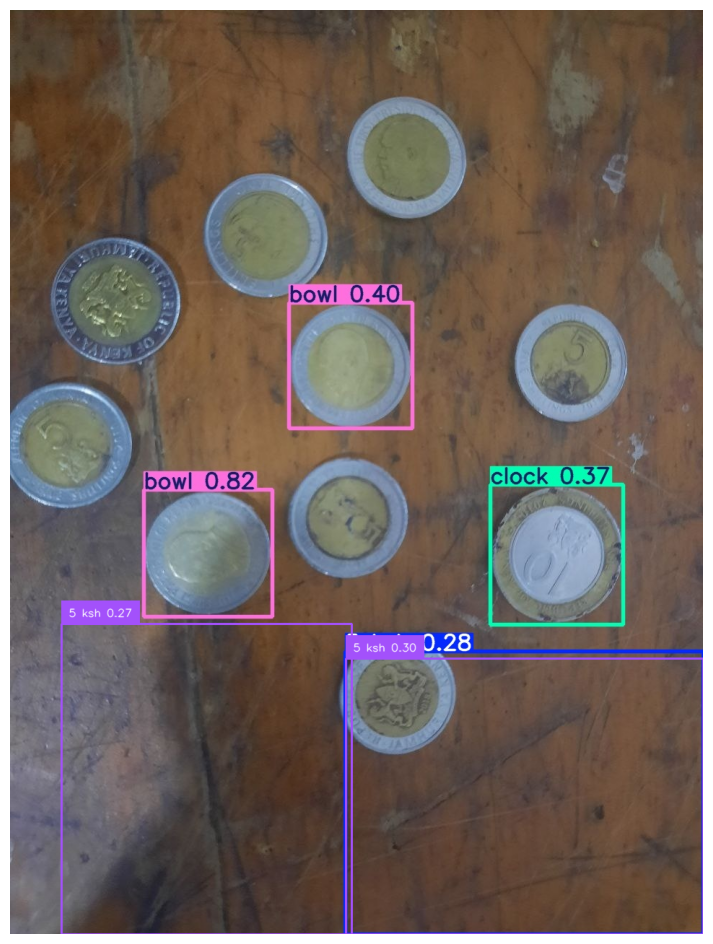

In [42]:
# Process results list
image = cv2.imread("result.jpg")
results = trained(image)[0]

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image, (12, 12))

